In [ ]:
import numpy as np
import pandas as pd
import random

In [ ]:
[-actual_values=np.random.choice([0,1],size=100)
predictions=np.random.choice([0,1],size=100)
df=pd.DataFrame({'Actual_values': actual_values,'Model_Predictions':predictions})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Datasets/test.csv')

In [ ]:
train.drop(['PassengerId','Ticket','Name','Cabin'],axis=1,inplace=True)
train.Age=train.Age.fillna(np.round(np.mean(train.Age),1))
train.Embarked=train.Embarked.fillna(train.Embarked.mode()[0])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
train.head

<bound method NDFrame.head of      Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female  29.7      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]>

In [ ]:
categories=['Sex','Pclass','Embarked']
codes={}
for col in categories:
  values=sorted(list(train[col].unique()))
  mapper=dict(zip(values,range(len(values))))
  codes[col]=mapper
  train[col]=train[col].replace(mapper)

In [ ]:
codes


{'Embarked': {'C': 0, 'Q': 1, 'S': 2},
 'Pclass': {1: 0, 2: 1, 3: 2},
 'Sex': {'female': 0, 'male': 1}}

In [ ]:
for col in categories:
  train[col]=train[col].astype("category")


In [ ]:
train['Survived']=train['Survived'].astype("category")

In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 31.8 KB


In [ ]:
train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,22.0,1,0,7.2500,2
1,1,0,0,38.0,1,0,71.2833,0
2,1,2,0,26.0,0,0,7.9250,2
3,1,0,0,35.0,1,0,53.1000,2
4,0,2,1,35.0,0,0,8.0500,2


In [ ]:
X_train=train.iloc[:,1:]
y_train=train.iloc[:,0]

#TEST

In [ ]:
### TEST
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
Passenger_Ids=test['PassengerId']
test.drop(['PassengerId','Ticket','Name','Cabin'],axis=1,inplace=True)
test.Age=test.Age.fillna(np.round(np.mean(test.Age),1))
test.Fare=test.Fare.fillna(np.round(np.mean(test.Fare),1))

In [ ]:
categories=['Sex','Pclass','Embarked']
codes={}
for col in categories:
  values=sorted(list(test[col].unique()))
  mapper=dict(zip(values,range(len(values))))
  codes[col]=mapper
  test[col]=test[col].replace(mapper)

In [ ]:
codes

{'Embarked': {'C': 0, 'Q': 1, 'S': 2},
 'Pclass': {1: 0, 2: 1, 3: 2},
 'Sex': {'female': 0, 'male': 1}}

In [ ]:
codes['Survived']={'dead':0,'survived':1}

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [ ]:
X_test=test

In [ ]:
features=X_train
target=y_train
features.shape

(891, 7)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(features, target,test_size=0.3, random_state=1)

In [ ]:
x_train.shape

(623, 7)

In [ ]:
Y_train.shape

(623,)

In [ ]:
x_test.shape

(268, 7)

In [ ]:
Y_test.shape

(268,)

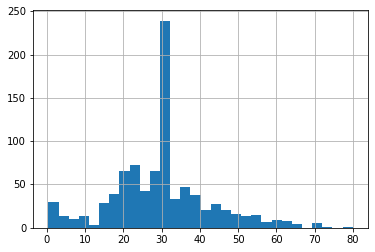

In [ ]:
hist = train['Age'].hist(bins=30)

In [ ]:
Child = train[train["Age"] <= 15]
print(Child)

    Survived Pclass Sex    Age  SibSp  Parch     Fare Embarked
7          0      2   1   2.00      3      1  21.0750        2
9          1      1   0  14.00      1      0  30.0708        0
10         1      2   0   4.00      1      1  16.7000        2
14         0      2   0  14.00      0      0   7.8542        2
16         0      2   1   2.00      4      1  29.1250        1
..       ...    ...  ..    ...    ...    ...      ...      ...
831        1      1   1   0.83      1      1  18.7500        2
850        0      2   1   4.00      4      2  31.2750        2
852        0      2   0   9.00      1      1  15.2458        0
869        1      2   1   4.00      1      1  11.1333        2
875        1      2   0  15.00      0      0   7.2250        0

[83 rows x 8 columns]


In [ ]:
from sklearn import tree
dtc= tree.DecisionTreeClassifier(max_depth=4,
                                 random_state=1,
                                 criterion='gini',
                                 min_samples_leaf=3,
                                 max_features=6)
dtc.fit(x_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
dtc.score(x_train,Y_train)

0.8667736757624398

In [ ]:
dtc.score(x_test,Y_test)

0.7723880597014925

In [ ]:

y_predict = dtc.predict(x_test)

y_predict_prob = dtc.predict_proba(x_test)


In [ ]:
result = pd.DataFrame({ "PassengerId" : Passenger_Ids, "Survived": y_predict.astype(int) })
result.to_csv("solution-DT3.csv", index=False)


ValueError: ignored

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(dtc, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.82539683 0.82539683 0.84126984 0.83870968 0.87096774 0.88709677
 0.88709677 0.83870968 0.85483871 0.80645161]
Mean: 0.8475934459805426
Standard Deviation: 0.02568216980924097


In [ ]:
test.drop(["Parch"], 1, inplace=True)

In [ ]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.82539683 0.82539683 0.84126984 0.83870968 0.87096774 0.88709677
 0.88709677 0.83870968 0.85483871 0.80645161]
Mean: 0.8475934459805426
Standard Deviation: 0.02568216980924097
